In [356]:
import pandas as pd
import numpy as np        
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [323]:
# Try reading the CSV file with different encodings
encodings = ['latin1', 'utf-8', 'cp1252']
for enc in encodings:
    try:
        df = pd.read_csv('spam.csv', encoding=enc)
        print(f"Successfully read the file with {enc} encoding")
        break
    except Exception as e:
        print(f"Failed to read with {enc} encoding: {e}")
# Display the first few rows to ensure it has been read correctly
print(df.head())


Successfully read the file with latin1 encoding
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [324]:
# Read the CSV file with the detected encoding
spam_df = pd.read_csv('C:\\Users\\Archita Dasgupta\\spam.csv', encoding='latin1')
# Save the dataframe to a new CSV file with UTF-8 encoding
spam_df.to_csv('C:\\Users\\Archita Dasgupta\\spam_utf8.csv', encoding='utf-8', index=False)
print("File has been converted to UTF-8 encoding and saved.")


File has been converted to UTF-8 encoding and saved.


In [325]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [326]:
new_spam=spam_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
print (new_spam)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [327]:
new_spam.rename(columns={'v1' : 'target','v2': 'Message'},inplace = True)

In [328]:
new_spam.isnull().sum()

target     0
Message    0
dtype: int64

In [329]:
new_spam["target"].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

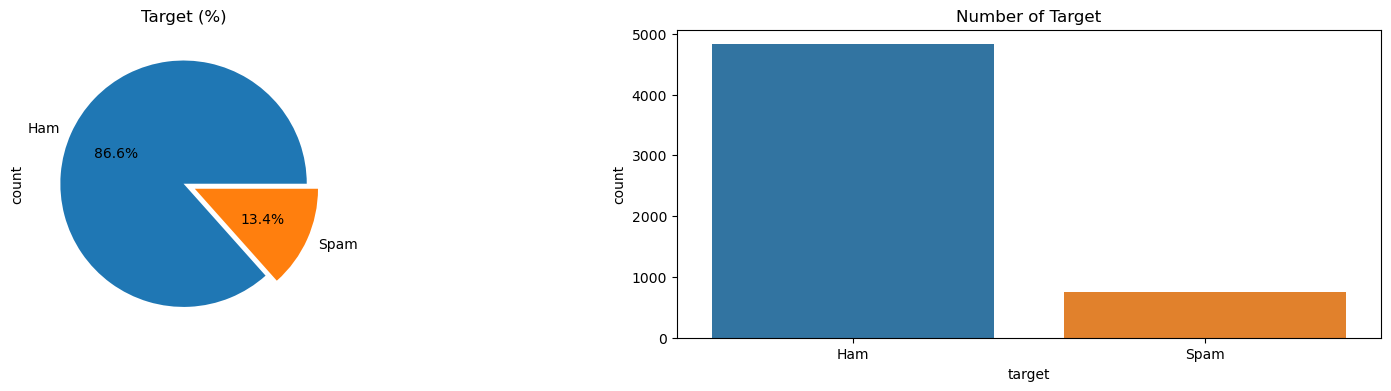

In [330]:
l = new_spam['target'].value_counts()
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,4))
plt.subplot(1,2,1)
l.plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=['Ham', 'Spam'])
plt.title('Target (%)')

plt.subplot(1,2,2)
ax = sns.countplot(x='target',data = new_spam)
ax.set_xticklabels(['Ham', 'Spam'])
plt.title('Number of Target')
plt.show()

In [331]:
#proceeding with naive bayes algorithm

In [332]:
new_spam1=spam_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
print (new_spam1)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [333]:
new_spam1.rename(columns={'v1' : 'target','v2': 'Message'},inplace = True)

In [334]:
new_spam['target'] = new_spam['target'].astype(str).str.strip()

# Encode the target variable
new_spam['target'] = new_spam['target'].map({'ham': 0, 'spam': 1})

# Drop rows with NaN values in target column
new_spam.dropna(subset=['target'], inplace=True)

# Check if there are any NaN values remaining
print(new_spam1['target'].isna().sum())


0


In [335]:
X_train, X_test, y_train, y_test = train_test_split(new_spam['Message'], new_spam['target'], test_size=0.2, random_state=42)

In [336]:
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

In [337]:
# Initialize the model
nb_model = MultinomialNB()

In [338]:
# Train the model
nb_model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [339]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test_vectorized)

In [340]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [341]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.99


In [342]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.89


In [343]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.94


In [344]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[963   2]
 [ 16 134]]


In [345]:
new_message = ["Are you feeling lonely? Click here to claim now."]

# Vectorize the new message
new_message_vectorized = vectorizer.transform(new_message)

# Predict the class
predicted_class = nb_model.predict(new_message_vectorized)
predicted_prob = nb_model.predict_proba(new_message_vectorized)

# Map the predicted class to ham/spam
predicted_label = "spam" if predicted_class[0] == 1 else "ham"

print(f"Predicted class: {predicted_label}")
print(f"Predicted probabilities: {predicted_prob}")

Predicted class: spam
Predicted probabilities: [[0.04765441 0.95234559]]


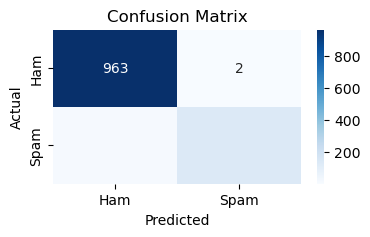

In [354]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [359]:
y_pred_prob = nb_model.predict_proba(X_test_vectorized)[:, 1]

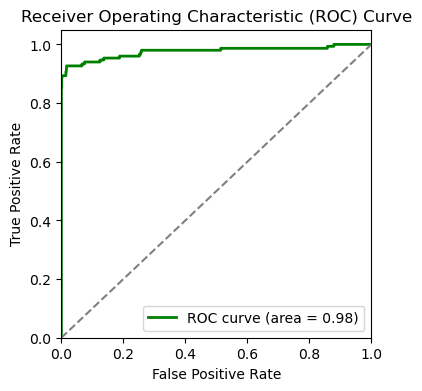

In [364]:
fpr, tpr, _ = roc_curve(y_test,y_pred_prob  )
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

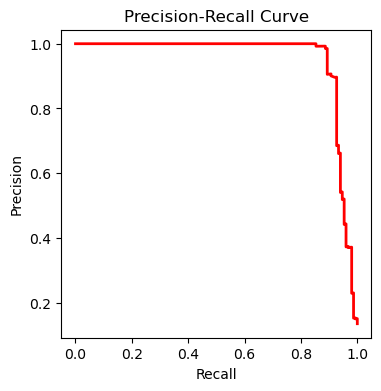

In [365]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob )
plt.figure(figsize=(4,4))
plt.plot(recall, precision, color='red', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()